# Práctica RL

## Importación de librerías

### Librerías a ocupar

**Numpy**: es una biblioteca de Python que se utiliza principalmente para el procesamiento de datos numéricos. Proporciona soporte para matrices y arreglos multidimensionales, junto con una amplia variedad de funciones matemáticas para realizar operaciones en estos arreglos de manera eficiente.

**Pandas**: es una biblioteca de Python ampliamente utilizada para la manipulación y el análisis de datos. Proporciona estructuras de datos de alto nivel y herramientas para trabajar con datos tabulares, como hojas de cálculo, bases de datos y archivos CSV.

**Seaborn**: es una biblioteca de Python que se utiliza principalmente para la visualización de datos estadísticos. Se basa en Matplotlib, otra biblioteca de visualización en Python, y proporciona una interfaz de alto nivel para crear gráficos estadísticos atractivos y informativos con facilidad. Seaborn es especialmente útil cuando se trabaja con DataFrames de Pandas, ya que está diseñado para trabajar de manera integrada con Pandas.

**Matplotlib.pyplot**: es un módulo de Matplotlib, una de las bibliotecas de visualización más populares en Python. pyplot proporciona una interfaz de alto nivel que simplifica la creación de gráficos y visualizaciones de datos en Python.

**Sklearn**: scikit-learn, comúnmente abreviado como sklearn, es una biblioteca de Python ampliamente utilizada para el aprendizaje automático y la minería de datos. Proporciona una amplia variedad de herramientas y algoritmos para realizar tareas relacionadas con la clasificación, regresión, agrupamiento, reducción de la dimensionalidad, selección de modelos y evaluación de modelos, entre otras. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Pandas y el dataSet

Cargamos el CSV en el dataFrame:

In [3]:
data = pd.read_csv("datasets/articulos_ml.csv", sep = ",")

Vemos las dimensiones de registros y columnas:

In [4]:
data.shape

(161, 8)

Mostramos el encabezado del dataFrame:

In [5]:
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


Visualizamos las estadísticas proporcionadas por el método describe de pandas:

In [6]:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


Visualizamos las características de entrada:

**data.drop(['Title', 'url', 'Elapsed days'], axis=1)**: Esta línea de código utiliza el método drop() de un DataFrame llamado data. El propósito de esta línea es eliminar las columnas llamadas 'Title', 'url' y 'Elapsed days' del DataFrame data. El argumento axis=1 indica que las columnas deben eliminarse (en oposición a las filas, que se eliminarían si axis=0).

**.hist(bins=100)**: Después de eliminar las columnas mencionadas en la línea anterior, se está generando un histograma de los datos resultantes. El método .hist() se utiliza para crear un histograma de los datos presentes en el DataFrame. El argumento bins=100 indica que se deben dividir los datos en 100 intervalos o "bins" para construir el histograma.

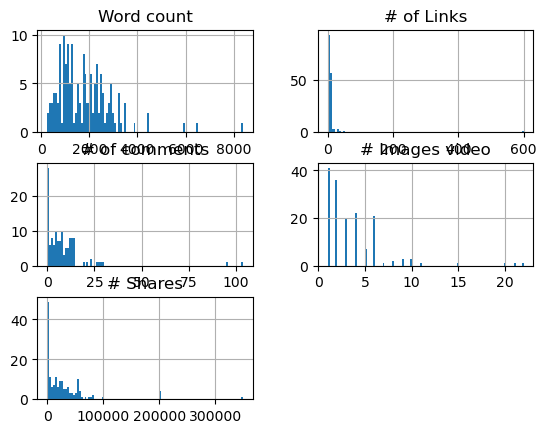

In [7]:
data.drop(['Title', 'url', 'Elapsed days'], axis = 1).hist(bins = 100)
plt.show()

La siguiente línea de código se utiliza para filtrar un DataFrame llamado data y crear un nuevo DataFrame llamado filtered_data basado en ciertas condiciones. Aquí está la explicación de esta línea:

- data['Word count'] <= 3500 y data['# Shares'] <= 80000 son dos condiciones booleanas que se aplican a las columnas del DataFrame data. En particular, la primera condición verifica si el valor en la columna 'Word count' es menor o igual a 3500, y la segunda condición verifica si el valor en la columna '# Shares' es menor o igual a 80000.

- data[(condición_1) & (condición_2)] **es una operación de indexación booleana que selecciona las filas del DataFrame data que cumplen con ambas condiciones.** En otras palabras, esta expresión filtra las filas de data en las que tanto la condición 1 como la condición 2 son verdaderas.

Este nuevo DataFrame contiene solo las filas de data que cumplen con las condiciones especificadas.

In [12]:
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

In [17]:
colores = ['orange', 'blue']
tamanios = [5, 5]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

In [18]:
print(f1)

[1742  962  761  753 1118 1581  256 1267  971  369  635 1631  571 1333
  364  515 1135  666  787  421 1065  908 1260  950 1761  911  971  458
  458  782 2080  250 1763  650 1184  957  627  895 1097 1262 1738 1813
 2400  662  800  367  507  992  499  619 1152 2363  988  759 1098 2797
 1120 2488 2049 2542 1011 2189 1864  990 1741 1229 2975 1864 2460 2136
 2833 1995 2332 1998 3442 2696 1913 1858 2457 2592 1718 1293 3023 3485
 2093 1490 1238 2583 1007  978 3019 2347 2224 1778 1150 2528 2486 2317
 2369 1612 1136 2721 3480 1143 2428 2877  776 1284 1145 1793 2904 1473
 2894 1932 3225 3185 2068 2354 2921 2211 2865 1674 2282 2636  774 1030
  734  743 1514 2854 1443 1817 1266 2275 1264 2212 1871 2513 1443  912
 2366 1542 1201 3239 2566 2089 1530  953]


In [19]:
print(f2)

[25000 42000 21000 77000 59400 35000 29000 37000 67300 60100  3200 37000
 55000 54800 54600 27000 20000  2400  3800 26000 14000 14000  3000  5600
  1500  8400  5300  2500   757  6400  3600    22  2300  2800  1300  2500
  4500   422  1600   715   907  2800  1300  3000  2800  3300  2600  2300
  1400  1800   867  1500   631  1200   950  1200   196  1100   668   424
     8   367 42406  1733 35691 11061 51319 30756 58425 48060     0  4988
 27984 45455 76585 24264  5261 25548     0 56376 13315 27476 55170   871
 39767 16390 23832 12269 10574 24206 13586 21123 32248  8001 23288 53720
 53449 52712 39681 39091 28116 25850 20880 17145 57058 19420  3298 31137
  5153 34515  7260     0 23152 30912 34669 12740 36707  1177 48927 11055
 49421 23018 54198   659 16641 19828 15047 16160 34065 17124 15512  9085
 16458 55738 18012 35392 26194 55914  3968  1824  2958 22359  8707  3239
 25019 49614 33660  5956]


Utiliza la función scatter de Matplotlib para crear un gráfico de dispersión (scatter plot) con datos.

plt.scatter: Esto invoca la función scatter de la biblioteca Matplotlib para crear el gráfico de dispersión.

f1 y f2: Estos son los valores que se representan en el eje x (horizontal) y el eje y (vertical) del gráfico de dispersión. f1 y f2 son variables que contienen los valores de los dos atributos o características que deseas representar en el gráfico.

c = asignar: El argumento c se utiliza para asignar colores a los puntos en el gráfico de dispersión. asignar es una variable que contiene información sobre qué color se asignará a cada punto del gráfico. Puede ser una lista de colores o una variable que contiene valores categóricos que determinan el color de cada punto.

s = tamanios[0]: El argumento s se utiliza para establecer el tamaño de los puntos en el gráfico de dispersión. tamanios[0] es una variable que contiene información sobre los tamaños de los puntos. Puede ser una lista de tamaños o una variable que contiene valores numéricos que determinan el tamaño de cada punto.

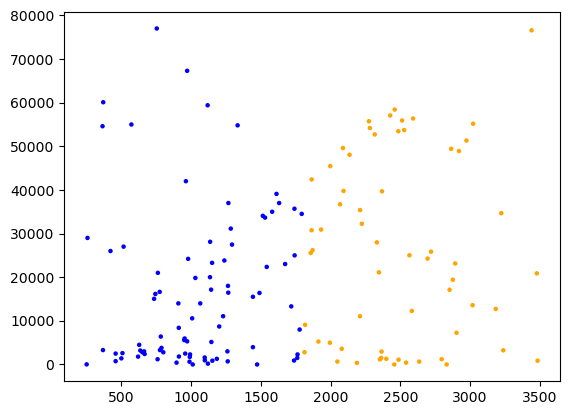

In [20]:
asignar = []

for index, row in filtered_data.iterrows():
    if(row['Word count'] > 1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1, f2, c = asignar, s = tamanios[0])
plt.show()

In [21]:
print(asignar)

['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'orange', 'orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'orange', 'blue', 'blue', 'blue', 'orange', 'blue', 'orange', 'orange', 'orange', 'blue', 'orange', 'orange', 'blue', 'blue', 'blue', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'blue', 'blue', 'orange', 'orange', 'orange', 'blue', 'blue', 'orange', 'blue', 'blue', 'orange', 'orange', 'orange', 'blue', 'blue', 'orange', 'orange', 'orange', 'orange', 'blue', 'blue', 'orange', 'orange', 'blue', 'orange', 'orange', 'blue', 'blue', 'blue', 'blue', 'orange', 'blue', 'orange', 'orange', 'or

# Entrenamiento

A continuación haremosuso de las librerías de pandas, de sklearn.linear_model más específicamente del Linear Regression y básicamente eso. Para empezar haremos una arreglo que contendrá los datos X que serán los datos de la columna Word count, y los datos de Y que representarán a la columna de Shares. Ojo! Los shares no se guardarán en un array, sino que serán una colección dentro de una variable. 

In [30]:
dataX = filtered_data[["Word count"]]
x_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

Vamos acrear un objeto de Modelo de Regresión Linear y lo guardaremos dentro de la variable reglin (regresion lineal)

In [32]:
reglin = linear_model.LinearRegression()

Entrenamos el modelo, en este caso fit es un método de reglin que se utiliza para ajustar (entrenar) el modelo de regresión lineal con datos de entrenamiento. Aquí, x_train representa las características (variables independientes) de entrenamiento y y_train representa las etiquetas o valores objetivos correspondientes (variable dependiente) en el conjunto de entrenamiento.

In [34]:
reglin.fit(x_train, y_train)

LinearRegression()

Cuando se llama a reglin.fit(x_train, y_train), el modelo de regresión lineal utiliza los datos proporcionados en x_train y y_train para aprender los coeficientes y parámetros que mejor se ajustan a los datos de entrenamiento. En otras palabras, el modelo encuentra la línea recta que mejor se ajusta a los puntos de datos en el espacio de características para minimizar el error cuadrático medio (MSE) entre las predicciones del modelo y los valores reales en y_train.

Después de ajustar el modelo, puedes usarlo para realizar predicciones en datos nuevos o de prueba utilizando el método predict. Por ejemplo:

In [35]:
y_pred = reglin.predict(x_train)

A continuación mostraremos los datos obtenidos, como el coeficiente, término independiente, el mean squared error y el puntaje de varianza.Todos ellos son propiedades el modelo de regresión lineal:

In [36]:
print('Coeficientes: \n', reglin.coef_)
print('Término independiente: \n', reglin.intercept_)
print("Error cuadrado medio: %.2f" % r2_score(y_train, y_pred))
print("Puntaje de varianza, el mejor puntaje es de 1.0: " % r2_score(y_train, y_pred))

Coeficientes: 
 [5.69765366]
Término independiente: 
 11200.303223074163
Error cuadrado medio: 0.06
Puntaje de varianza, el mejor puntaje es de 1.0: 


Predicción de cuántos "Share" tendrá por un artículo de 2000 palabras, según el modelo:

In [38]:
y_Dosmil = reglin.predict([[2000]])
print(int(y_Dosmil))

22595


Nuestro modelo funciona, sin embargo puede ser mejor, actualmente solo tiene dos dimensiones, una que es las características del entrenamiento y otro con los objetivos del entrenamiento. Sin embargo, para mejorar esto lo que haremos será aumentar una dimensión. 

Para poder graficar en 3D, haremos una variable nueva que será la suma de los enlaces, comentarios e imágenes:

In [39]:
suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])

Una vez sumados lo que haremos será crear un dataFrame llamado dataX2, después a su columna Word count le asignamos los resutlados de la columna "Word count" de filtered_data. Después asignamos a la columna suma los registros de la variable suma de arriba.

In [40]:
dataX2 = pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma

Después creamos un array de pandas con los valores de dataX2, este nuevo array será el que utilizaremos para entrenar el modelo y lo llamaremos XY_train. Después creamos una variable z_train que contendrá los valores de la columna filtered_data['# Shares'].

In [41]:
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values

Creamos un nuevo objeto de regresión linea, al objeto lo entrenamos con las variables XY_train y el Z_train, para que después podamos hacer la predicción:

In [43]:
reglin2 = linear_model.LinearRegression()
reglin2.fit(XY_train, z_train)

z_pred = reglin2.predict(XY_train)

In [51]:
ejemplo_prediccion = np.array([[2000, 18]])
y_Dosmil = reglin2.predict(ejemplo_prediccion)
print(int(y_Dosmil))

21484


# Entrenamientos de Tarea

## '# Shares' a partir de '# of Links'

In [54]:
data.dtypes
nuevoData = pd.DataFrame()
nuevoData["Links"] = data["# of Links"]
nuevoData.Links.value_counts()

Links
3      22
1      21
6      19
5      18
8      16
2      15
4      15
7      11
10      7
9       2
0       2
30      2
21      1
600     1
13      1
39      1
32      1
20      1
22      1
11      1
12      1
15      1
49      1
Name: count, dtype: int64

In [93]:
filtered_data_links = data[(data['# of Links'] <= 8) & (data['# Shares'] <= 80000)]

dataX_links = filtered_data_links[["# of Links"]]
x_train_links = np.array(dataX_links)
y_train_links = filtered_data_links['# Shares'].values

reglin_links = linear_model.LinearRegression()
reglin_links.fit(x_train_links, y_train_links)
y_pred_links = reglin_links.predict(x_train_links)

ejemplo_prediccion = np.array([[6]])
y_SeisLinks = reglin_links.predict(ejemplo_prediccion)
print(int(y_SeisLinks))

22265


## '# Shares' a partir de '# of comments'

In [95]:
data.dtypes
nuevoData = pd.DataFrame()
nuevoData["Comments"] = data["# of comments"]
nuevoData.Comments.value_counts()

Comments
0.0      19
5.0      10
8.0      10
1.0       9
12.0      8
3.0       8
13.0      8
14.0      8
6.0       7
7.0       7
4.0       6
2.0       6
11.0      5
10.0      5
9.0       3
23.0      2
19.0      1
27.0      1
29.0      1
95.0      1
28.0      1
21.0      1
30.0      1
104.0     1
Name: count, dtype: int64

In [98]:
filtered_data_comments = data[(data['# of comments'] <= 15) & (data['# Shares'] <= 80000)]

dataX_comments = filtered_data_comments[["# of Links"]]
x_train_comments = np.array(dataX_comments)
y_train_comments = filtered_data_comments['# Shares'].values

reglin_comments = linear_model.LinearRegression()
reglin_comments.fit(x_train_comments, y_train_comments)
y_pred_comments = reglin_comments.predict(x_train_comments)

ejemplo_prediccion = np.array([[6]])
y_SeisComments = reglin_comments.predict(ejemplo_prediccion)
print(int(y_SeisComments))

20640


## '# Shares' a partir de '# Images video'

In [99]:
data.dtypes
nuevoData = pd.DataFrame()
nuevoData["Images"] = data["# Images video"]
nuevoData.Images.value_counts()

Images
1     41
2     36
4     22
6     21
3     20
5      7
9      3
10     3
8      2
15     1
21     1
20     1
11     1
22     1
7      1
Name: count, dtype: int64

In [102]:
filtered_data_images = data[(data['# Images video'] <= 10) & (data['# Shares'] <= 80000)]

dataX_images = filtered_data_images[["# Images video"]]
x_train_images = np.array(dataX_images)
y_train_images = filtered_data_images['# Shares'].values

reglin_images = linear_model.LinearRegression()
reglin_images.fit(x_train_images, y_train_images)
y_pred_images = reglin_images.predict(x_train_images)

ejemplo_prediccion = np.array([[6]])
y_SeisImages = reglin_images.predict(ejemplo_prediccion)
print(int(y_SeisImages))

18538


## '# Shares' a partir de 'Elapsed days'

In [105]:
data.dtypes
nuevoData = pd.DataFrame()
nuevoData["Elapsed"] = data["Elapsed days"]
nuevoData.Elapsed.value_counts()

Elapsed
60     3
127    3
62     3
61     2
18     2
      ..
345    1
237    1
250    1
265    1
88     1
Name: count, Length: 133, dtype: int64

In [104]:
filtered_data_elapsed = data[(data['Elapsed days'] <= 10) & (data['# Shares'] <= 80000)]

dataX_elapsed = filtered_data_elapsed[["Elapsed days"]]
x_train_elapsed = np.array(dataX_elapsed)
y_train_elapsed = filtered_data_elapsed['# Shares'].values

reglin_elapsed = linear_model.LinearRegression()
reglin_elapsed.fit(x_train_elapsed, y_train_elapsed)
y_pred_elapsed = reglin_elapsed.predict(x_train_elapsed)

ejemplo_prediccion = np.array([[6]])
y_SeisElapsed = reglin_elapsed.predict(ejemplo_prediccion)
print(int(y_SeisElapsed))

25484
